# Correlation and ranked correlation of spread centrality with eigenvector, degree, betweenness and closeness centrality

In [1]:
import numpy as np
from scipy.stats import spearmanr
from dissim.igraph_util import load_graph_here
from dissim.centrality import compute_spread_centrality_of_graph, compute_eigenvector_centrality_of_graph, compute_degree_centrality_of_graph, compute_closeness_centrality_of_graph, compute_betweenness_centrality_of_graph
import matplotlib.pyplot as plt

In [2]:
kg = load_graph_here("karate")
ksc = compute_spread_centrality_of_graph(kg)
kdc = compute_degree_centrality_of_graph(kg)
kcc = compute_closeness_centrality_of_graph(kg)
kbc = compute_betweenness_centrality_of_graph(kg)
kec = compute_eigenvector_centrality_of_graph(kg)

In [3]:
print(f"Karate n = {len(kg.vs)}, m = {len(kg.es)}")

def print_corr(name1, k1, name2, k2):
    kcor = np.corrcoef(k1, k2)[0,1]
    krcor = spearmanr(k1, k2)
    print(f"Karate graph {name1} vs. {name2} correlation: {kcor} and ranked correlation: {krcor}")

print_corr("spread", ksc, "degree", kdc)
print_corr("spread", ksc, "closeness", kcc)
print_corr("spread", ksc, "betweenness", kbc)
print_corr("spread", ksc, "eigenvector", kec)

Karate n = 34, m = 78
Karate graph spread vs. degree correlation: 0.918831918666352 and ranked correlation: SpearmanrResult(correlation=0.7647966928050735, pvalue=1.3930842782216753e-07)
Karate graph spread vs. closeness correlation: 0.8803031410360745 and ranked correlation: SpearmanrResult(correlation=0.8537249946956131, pvalue=1.3850496918707137e-10)
Karate graph spread vs. betweenness correlation: 0.8096750532765856 and ranked correlation: SpearmanrResult(correlation=0.6901759456053488, pvalue=6.290094460823593e-06)
Karate graph spread vs. eigenvector correlation: 0.9827799337839916 and ranked correlation: SpearmanrResult(correlation=0.9964006349559927, pvalue=7.096166556220867e-36)


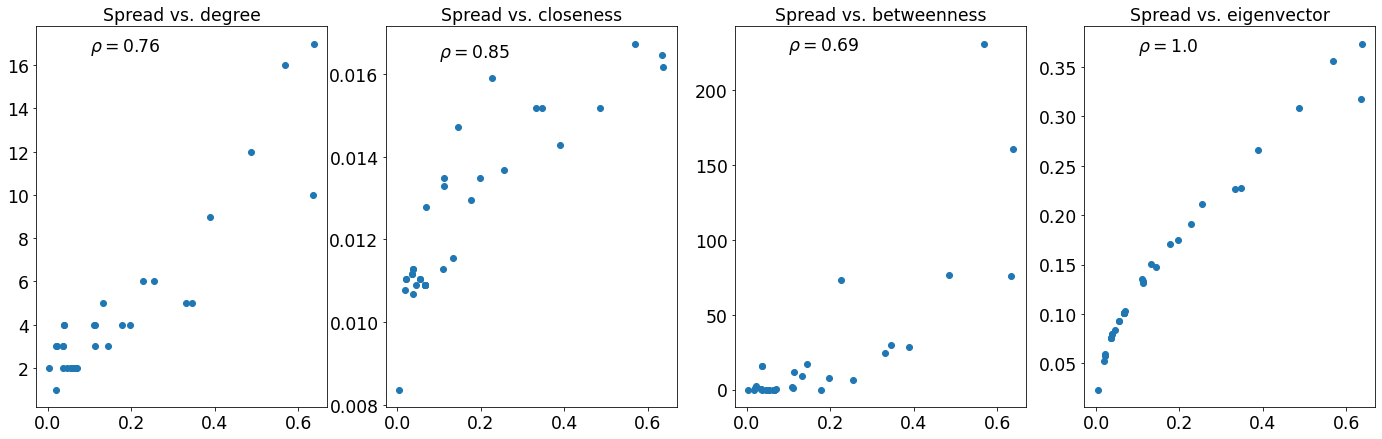

In [4]:
fig, ax = plt.subplots(1, 4, figsize=(24, 7))
ys = [kdc, kcc, kbc, kec]
names = ["degree", "closeness", "betweenness", "eigenvector"]
rvalues = [np.around(spearmanr(ksc, y).correlation, decimals=2) for y in ys]
for i in range(4):
    ax[i].scatter(ksc, ys[i])
    rvs = str(rvalues[i])
    ax[i].text(0.1, 0.98*max(ys[i]), r"$\rho = " + rvs + "$", size="xx-large")
    ax[i].set_title(f"Spread vs. {names[i]}", size="xx-large")
    #ax[i].set_ylim(0, 1.2 * max(ys[i]))
    ax[i].tick_params(labelsize="xx-large")
#plt.savefig("../doc/correlations.jpg", dpi=300, bbox_inches="tight")
plt.savefig("../doc/correlations.eps", format="eps", dpi=300)
plt.show()

In [4]:
fg = load_graph_here("football")
fss = compute_spread_centrality_of_graph(fg)
fes = compute_eigenvector_centrality_of_graph(fg)

In [7]:
fcor = np.corrcoef(fss, fes)
frcor = spearmanr(fss, fes)
print(f"Football graph correlation: {fcor} and ranked correlation: {frcor}")

Football graph correlation: [[1.         0.98957241]
 [0.98957241 1.        ]] and ranked correlation: SpearmanrResult(correlation=0.990538941055788, pvalue=2.575936207035888e-99)


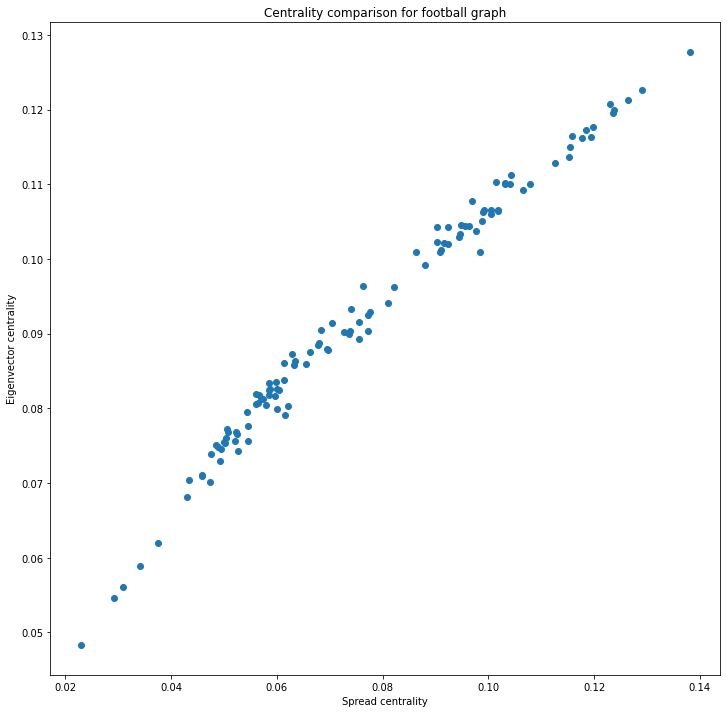

In [9]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(fss, fes)
ax.set_xlabel("Spread centrality")
ax.set_ylabel("Eigenvector centrality")
ax.set_title("Centrality comparison for football graph")
plt.show()